# Importar paquetes de herramientas:
Hay herramientas que sirven para analizar los datos, otros que son para trabajar con datos y otras que sirven para hacer cosas varias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Departamentos en Venta
En el presente trabajo, se analizarán dos bases de datos en conjunto. Estas bases fueron obtenidas del Data Warehouse del Gobierno de la Ciudad y contiene información de los departamentos de los departamentos en venta en la Ciudad de Buenos Aires.
Se utilizan 2 bases distintas ya que las mismas se encuentran divividas por año, por lo que tomamos los datos de 2015 y 2016.

Adicionalmente se agrega un Excel compuesto por los barrios de CABA y su número unico.

Leemos los datos:

In [2]:
deptos2015 = pd.read_csv("C:/Users/Santiago/OneDrive/Universidad/Ciencia de Datos/Trabajo Practico/departamentos-en-venta-2015.csv", delimiter=";")
deptos2016 = pd.read_csv("C:/Users/Santiago/OneDrive/Universidad/Ciencia de Datos/Trabajo Practico/departamentos-en-venta-2016.csv", delimiter=";")
barrios = pd.read_excel("C:/Users/Santiago/OneDrive/Universidad/Ciencia de Datos/Trabajo Practico/DataBarrios.xlsx")
print("La base del año 2015 posee {0} filas y {1} columnas".format(np.shape(deptos2015)[0],np.shape(deptos2015)[1]))
print("La base del año 2016 posee {0} filas y {1} columnas".format(np.shape(deptos2016)[0],np.shape(deptos2016)[1]))

La base del año 2015 posee 11414 filas y 35 columnas
La base del año 2016 posee 7564 filas y 29 columnas


In [3]:
deptos2016.head(2)

,CALLE,NUMERO,ID_ZONAPRO,OPERACION,TIPO,M2,M2CUB,PRECIOTEXT,PRECIOARS,PRECIOARSM,...,URL,REVISION,NOTA,DIRECCION_NORMALIZADA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD
0,GUATEMALA,5574.0,42408691,VTA,DTO,57,50,U$S 170.150,2977625,59553,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,NaN,NaN,GUATEMALA 5574,PALERMO,COMUNA 14,1425.0,C1425BVH,-34.580581,-58.431758
1,ZAPATA,300.0,42408710,VTA,DTO,46,46,U$S 118.650,2076375,45139,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,NaN,NaN,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609


In [4]:
deptos2016.head(2)

,CALLE,NUMERO,ID_ZONAPRO,OPERACION,TIPO,M2,M2CUB,PRECIOTEXT,PRECIOARS,PRECIOARSM,...,URL,REVISION,NOTA,DIRECCION_NORMALIZADA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD
0,GUATEMALA,5574.0,42408691,VTA,DTO,57,50,U$S 170.150,2977625,59553,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,NaN,NaN,GUATEMALA 5574,PALERMO,COMUNA 14,1425.0,C1425BVH,-34.580581,-58.431758
1,ZAPATA,300.0,42408710,VTA,DTO,46,46,U$S 118.650,2076375,45139,...,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,NaN,NaN,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609


Puede verse que la base de 2016 posee menos columnas que la de 2015, por lo que se deben explorar los datos y transformarlos en función de hacer una unión entre ambas.
Hallamos las columnas que no poseen un nombre igual entre ambas tablas

In [5]:
columns2015 = (deptos2015.columns).str.lower()
columns2016 = (deptos2016.columns).str.lower()
interseccion = np.intersect1d(columns2015,columns2016)

intersecc2015 = columns2015[columns2015.isin(interseccion) == False]
intersecc2016 = columns2016[columns2016.isin(interseccion) == False]

print(intersecc2015.sort_values())
print(intersecc2016.sort_values())

Index(['a_estrenar', 'area', 'av_score', 'av_side', 'barrio_normalizado',
       'barrios', 'baul', 'baño', 'cochera', 'comuna_normalizada',
       'dependencia', 'dormitorio', 'edificacion', 'frente_y_contra', 'fuente',
       'lavadero', 'nomb_ca_co', 'obs1', 'piso', 'terraza', 'zona'],
      dtype='object')
Index(['barrio', 'baños', 'id_zonapro', 'location', 'm2cub', 'nota',
       'operacion', 'precioars', 'precioarsm', 'preciotext', 'procesado',
       'publicado', 'revision', 'tipo', 'url'],
      dtype='object')


### Detectamos que algunas columnas poseen nombres similares:
- barrio_normalziado // barrio
- baño // baños
- av_score // nota


## Comencemos con barrios

In [6]:
barrios2016 = deptos2016.BARRIO.unique()
barrios2015 = deptos2015.BARRIO_NORMALIZADO.unique()
print("La base de 2015 posee {0} barrios".format(deptos2015.BARRIO_NORMALIZADO.unique().shape[0]))
print("La base de 2016 posee {0} barrios".format(deptos2016.BARRIO.unique().shape[0]))
print("Tienen en común {0} barrios".format(np.shape(np.intersect1d(barrios2016[pd.notnull(barrios2016)], barrios2015[pd.notnull(barrios2015)]))[0]))

La base de 2015 posee 49 barrios
La base de 2016 posee 48 barrios
Tienen en común 45 barrios


In [7]:
deptos2015.rename(columns={'BARRIO_NORMALIZADO': "BARRIO"}, inplace=True)

#### Luego de haber cambiado el nombre a Barrios, seguimos con baño

In [8]:
print(deptos2015.BAÑO.unique())
print(deptos2016.BAÑOS.unique())

[1 5 2 3 4 0 6]
[1 2 0 3 4 5 6]


Puede visualizarse que en ambas bases el campo contiene la cantidad de baños que posee la propiedad en venta, por lo que procedemos a renombrar las columas.

In [9]:
deptos2015.rename(columns={'BAÑO': "BAÑOS"}, inplace=True)

Notamos que las columnas COMUNA poseen una diferencia entre la base de 2015 y 2016, ya que una posee el numero de la comuna y la otra posee el número de comuna + el prefijo "COMUNA"

In [10]:
print(deptos2015.COMUNA.unique())
print(deptos2016.COMUNA.unique())

[14 13 15  1  8  3  4 10  9  6 12  7  5  2 11]
['COMUNA 14' 'COMUNA 15' nan 'COMUNA 12' 'COMUNA 05' 'COMUNA 13'
 'COMUNA 06' 'COMUNA 03' 'COMUNA 01' 'COMUNA 10' 'COMUNA 07' 'COMUNA 04'
 'COMUNA 02' 'COMUNA 11' 'COMUNA 08' 'COMUNA 09']


###### Adicionalmente, vemos que el dataset del año 2015 posee una columna de COMUNA NORMALIZADA que iguala al formato de 2016. Por ello vamos a eliminar la columna de COMUNA y renombrar la COLUMNA NORMALIZADA por COMUNA para hacer la unión entre ambas.

In [11]:
print(deptos2015.COMUNA_NORMALIZADA.unique())
deptos2015 = deptos2015.drop(columns="COMUNA")

['COMUNA 14' 'COMUNA 13' ' ' 'COMUNA 15' 'COMUNA 1' 'COMUNA 8' 'COMUNA 3'
 'COMUNA 4' 'COMUNA 10' 'COMUNA 9' 'COMUNA 6' 'COMUNA 12' 'COMUNA 7'
 'COMUNA 5' 'COMUNA 2' 'COMUNA 11']


In [12]:
deptos2015 = deptos2015.rename(columns={"COMUNA_NORMALIZADA": "COMUNA"})

# Realizamos la concatenación de los datasets

In [13]:
deptoscat = pd.concat([deptos2015,deptos2016], join='inner')

In [14]:
deptoscat.shape

(18978, 16)

In [15]:
deptoscat.head(2)

,CALLE,NUMERO,M2,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÑOS,DIRECCION,DIRECCION_NORMALIZADA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD
0,11 DE SEPTIEMBRE DE 1888,800.0,46,149500,3250,1,,1,800 11 DE SEPTIEMBRE DE 1888,11 DE SEPTIEMBRE DE 1888 800,PALERMO,COMUNA 14,1426,C1426BK,-34.570298,-58.440122
1,11 DE SEPTIEMBRE DE 1888,900.0,350,880000,"2514,3",4,30,5,900 11 DE SEPTIEMBRE DE 1888,11 DE SEPTIEMBRE DE 1888 900,PALERMO,COMUNA 14,1426,C1426BK,-34.569472,-58.441187


In [16]:
deptoscat = deptoscat.merge(barrios, how="left", left_on="BARRIO", right_on="BARRIO")

In [17]:
nullscomuna = deptoscat.loc[deptoscat.COMUNA.isnull()]
print(nullscomuna.isnull().count())
nullscomuna.head(10)

CALLE                      1382
NUMERO                     1382
M2                         1382
DOLARES                    1382
U_S_M2                     1382
AMBIENTES                  1382
ANTIGUEDAD                 1382
BAÑOS                      1382
DIRECCION                  1382
DIRECCION_NORMALIZADA      1382
BARRIO                     1382
COMUNA                     1382
CODIGO_POSTAL              1382
CODIGO_POSTAL_ARGENTINO    1382
LATITUD                    1382
LONGITUD                   1382
Numero                     1382
dtype: int64


,CALLE,NUMERO,M2,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÑOS,DIRECCION,DIRECCION_NORMALIZADA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD,Numero
11421,NaN,NaN,82,265000,4569,2,0,2,OLAGUER Y FELIU VIRREY AL 2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11430,NaN,NaN,48,143000,2979,0,0,1,AL 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11431,NaN,NaN,47,144000,3064,0,0,1,AL 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11432,NaN,NaN,47,151000,3213,0,0,1,AL 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11433,NaN,NaN,47,152000,3234,0,0,1,AL 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11448,NaN,NaN,44,103000,2512,0,0,2,INDEPENDENCIA AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11449,NaN,NaN,46,115000,2805,0,0,2,INDEPENDENCIA AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11450,NaN,NaN,44,104000,2537,0,0,2,INDEPENDENCIA AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11451,NaN,NaN,40,94000,2611,0,0,2,INDEPENDENCIA AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11458,NaN,NaN,47,130000,2766,0,0,1,AL 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tenemos 1382 propiedades que no poseen Comuna, Calle o Numero
Se procederá a elimnar estas, ya que no representan un gran porcentaje del dataset y la información faltante es muy importante. Tampoco se posee la Longitud y Latitud para poder estimar su ubicación.

In [18]:
deptosconcat = deptoscat.loc[deptoscat.COMUNA.notnull()]
deptosconcat = deptosconcat.loc[deptosconcat.ANTIGUEDAD.notnull()]
deptosconcat = deptosconcat.loc[deptosconcat.BARRIO.notnull()]
deptosconcat = deptosconcat.loc[deptosconcat.DOLARES.notnull()]
deptosconcat = deptosconcat.loc[deptosconcat.COMUNA != " "]

In [19]:
deptosconcat.COMUNA.unique()

array(['COMUNA 14', 'COMUNA 13', 'COMUNA 15', 'COMUNA 1', 'COMUNA 8',
       'COMUNA 3', 'COMUNA 4', 'COMUNA 10', 'COMUNA 9', 'COMUNA 6',
       'COMUNA 12', 'COMUNA 7', 'COMUNA 5', 'COMUNA 2', 'COMUNA 11',
       'COMUNA 05', 'COMUNA 06', 'COMUNA 03', 'COMUNA 01', 'COMUNA 07',
       'COMUNA 04', 'COMUNA 02', 'COMUNA 08', 'COMUNA 09'], dtype=object)

In [20]:
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 1"] = "COMUNA 01"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 2"] = "COMUNA 02"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 3"] = "COMUNA 03"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 4"] = "COMUNA 04"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 5"] = "COMUNA 05"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 6"] = "COMUNA 06"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 7"] = "COMUNA 07"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 8"] = "COMUNA 08"
deptosconcat.COMUNA.loc[deptosconcat.COMUNA == "COMUNA 9"] = "COMUNA 09"

In [21]:
deptosconcat.COMUNA.unique()

array(['COMUNA 14', 'COMUNA 13', 'COMUNA 15', 'COMUNA 01', 'COMUNA 08',
       'COMUNA 03', 'COMUNA 04', 'COMUNA 10', 'COMUNA 09', 'COMUNA 06',
       'COMUNA 12', 'COMUNA 07', 'COMUNA 05', 'COMUNA 02', 'COMUNA 11'],
      dtype=object)

##### En el siguiente grafico, podemos ver como la zona sur de la Capital Federal es la parte donde menos publicaciones hay. Esto se debe principalmente que en esa zona se encuentran muchos terrenos sin edificar, como puede ser el Parque Indoamericano o el Parque de la Ciudad.

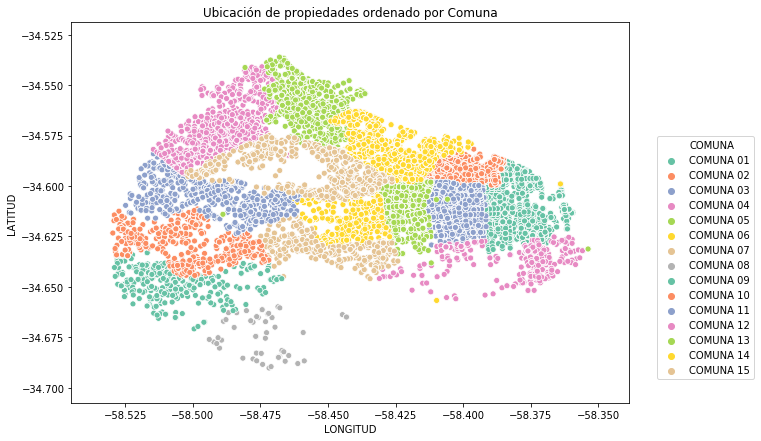

In [22]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="LONGITUD", y="LATITUD", data=deptosconcat.sort_values(by="COMUNA"), hue="COMUNA", palette='Set2')
plt.title("Ubicación de propiedades ordenado por Comuna", loc="center")
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)
plt.show()

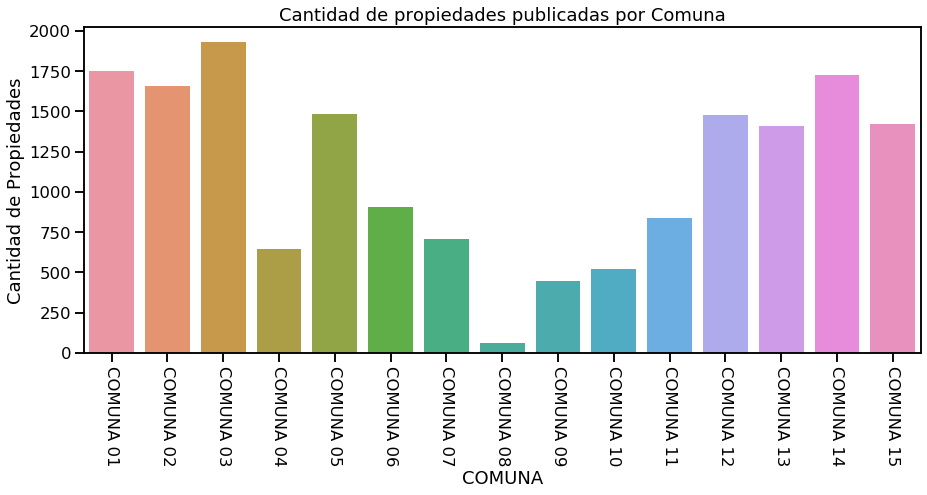

In [23]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(15,6))
sns.countplot(deptosconcat.COMUNA.sort_values(ascending = True)) #.values forma de quedarme con las columnas pero sin formato pandas. Pasa a ser un array
plt.title("Cantidad de propiedades publicadas por Comuna")
plt.ylabel("Cantidad de Propiedades")
plt.xticks(rotation=-90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

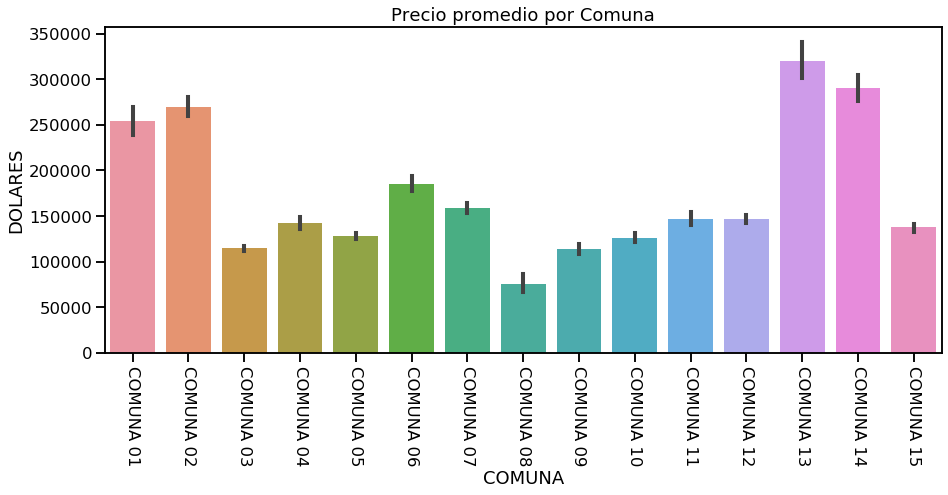

In [24]:
plt.figure(figsize=(15,6))
plt.title("Precio promedio por Comuna")
sns.barplot(x="COMUNA", y= "DOLARES", data=deptosconcat.sort_values(by='COMUNA'), estimator=np.average)
plt.xticks(rotation = -90)

##### Puede verser que la Comuna 13 es la más cara de toda la Capital Federal

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

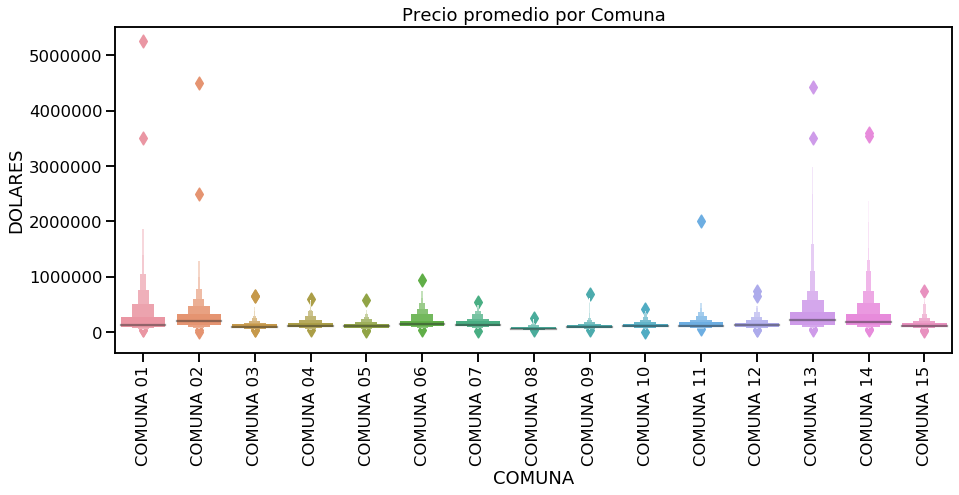

In [25]:
plt.figure(figsize=(15,6))
plt.title("Precio promedio por Comuna")
sns.boxenplot(x="COMUNA", y="DOLARES", data=deptosconcat.sort_values(by="COMUNA"))
plt.xticks(rotation = 90)

In [26]:
deptosconcat.NEWCOMUNA = deptosconcat.COMUNA

In [27]:
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 01"] = 1
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 02"] = 2
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 03"] = 3
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 04"] = 4
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 05"] = 5
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 06"] = 6
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 07"] = 7
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 08"] = 8
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 09"] = 9
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 10"] = 10
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 11"] = 11
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 12"] = 12
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 13"] = 13
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 14"] = 14
deptosconcat.NEWCOMUNA[deptosconcat.NEWCOMUNA == "COMUNA 15"] = 15

In [28]:
deptosconcat['ANTIGUEDAD'] = deptosconcat['ANTIGUEDAD'].convert_objects(convert_numeric=True)
deptosconcat['U_S_M2'] = deptosconcat['U_S_M2'].convert_objects(convert_numeric=True)

In [29]:
deptosconcat.U_S_M2 = deptosconcat.DOLARES / deptosconcat.M2

In [30]:
deptosconcat = deptosconcat[deptosconcat.ANTIGUEDAD.notnull()]

In [32]:
deptosconcat.isnull().any()

CALLE                      False
NUMERO                     False
M2                         False
DOLARES                    False
U_S_M2                     False
AMBIENTES                  False
ANTIGUEDAD                 False
BAÑOS                      False
DIRECCION                  False
DIRECCION_NORMALIZADA      False
BARRIO                     False
COMUNA                     False
CODIGO_POSTAL               True
CODIGO_POSTAL_ARGENTINO     True
LATITUD                    False
LONGITUD                   False
Numero                     False
dtype: bool

#### Por último tomamos únicamente el percentil 97 del precio en dólares de las propiedades, para quitar outliers.

In [33]:
QUANTIL = deptosconcat.DOLARES.quantile(0.98)
deptosconcat98 = deptosconcat[deptosconcat.DOLARES < QUANTIL]
deptosconcat98.shape

(12015, 17)

Procedemos a dividir el dataset en dos diferentes (X e Y) donde Y posee una sola feature que será el valor del M2 que esperamos precedecir con la regresión. Utilizamos este tipo de aprendizaje supervisado porque esa feature contiene valores continuos

In [34]:
y = np.array(deptosconcat98[["U_S_M2"]])
x = deptosconcat98.drop(['CALLE', 'NUMERO','U_S_M2','DIRECCION','DIRECCION_NORMALIZADA','BARRIO','COMUNA','CODIGO_POSTAL','CODIGO_POSTAL_ARGENTINO','LATITUD','LONGITUD'], axis=1)

# Realizamos una estandarización de los datos con una previa división en Train y Test del 40%.

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.40, random_state=8)

In [36]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest)

# Realizamos la regresión con Regresión Lineal

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
ypred = lr.predict(xtest_scal)

In [41]:
np.shape(ypred)

(4806, 1)

In [42]:
np.sqrt(mean_squared_error(ypred, ytest))

368.0280702307101

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, ypred)

256.0119383097713

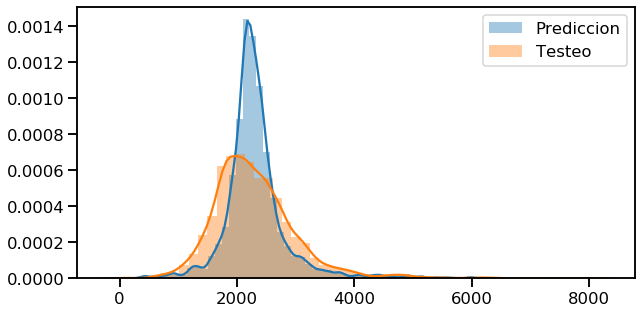

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(ypred[ypred>0], label="Prediccion")
sns.distplot(ytest[ytest>0], label="Testeo")
plt.legend(loc=1)


In [45]:
 (ytest,ypred)

0.727693515595386

# Realizamos la regresión con KNN


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
neigh = KNeighborsRegressor(weights = "distance")
parameters_k = np.arange(20,31,5)
parameters_knn = [{'n_neighbors': parameters_k}]
n_folds = 20

In [48]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds, verbose=True)

In [49]:
regresor_neigh.fit(xtrain_scal, ytrain)

Fitting 20 folds for each of 3 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.2s finished


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [50]:
print(regresor_neigh.best_params_)
print(regresor_neigh.best_score_)

{'n_neighbors': 20}
0.8588016515234456


In [51]:
ypred2 = regresor_neigh.predict(xtest_scal)
ypred2

array([[3200.        ],
       [2464.33613452],
       [2344.5005584 ],
       ...,
       [1921.99165535],
       [2025.58990366],
       [3095.23809524]])

In [52]:
np.sqrt(mean_squared_error(ytest, ypred2))

286.20042457974995

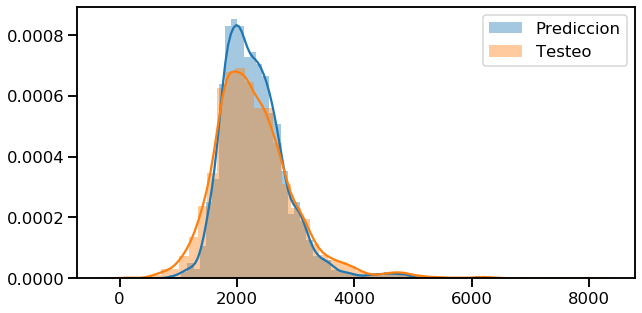

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(ypred2, label="Prediccion")
sns.distplot(ytest, label="Testeo")
plt.legend(loc=1)
plt.show()


In [54]:
r2_score(ytest, ypred2)

0.8353215988559058

In [55]:
np.mean(ytest)

2290.936853372146

In [56]:
mean_absolute_error(ytest, ypred2)

165.15243596968298

## Puede verse que el R2 explica un 84%, es decír que el 84% de la variación de las variables dependientes esta explicada por la variación de las independientes

# Realizamos la regresión con Support Vector Regression


In [57]:
svreg = SVR()

In [58]:
n_folds = 5

In [59]:
parameters_svr_lin = [{'kernel':['linear'], 'C': [1, 100]}]

parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]

In [60]:
regresor_svr = GridSearchCV(svreg, parameters_svr_lin, cv=n_folds, verbose=True)

In [61]:
regresor_svr.fit(xtrain_scal, ytrain.ravel())
#svr_lin.fit(xtrain_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [62]:
regresor_svr.best_params_

{'C': 1, 'kernel': 'linear'}

In [63]:
regresor_svr.best_score_

0.639531165143469

In [64]:
ypred3 = regresor_svr.predict(xtest_scal)
ypred3

array([2497.33257236, 2091.5018216 , 2304.06860384, ..., 2121.41430182,
       1950.44429288, 2393.43034653])

In [65]:
np.sqrt(mean_squared_error(ytest, ypred3))

396.22878111479986

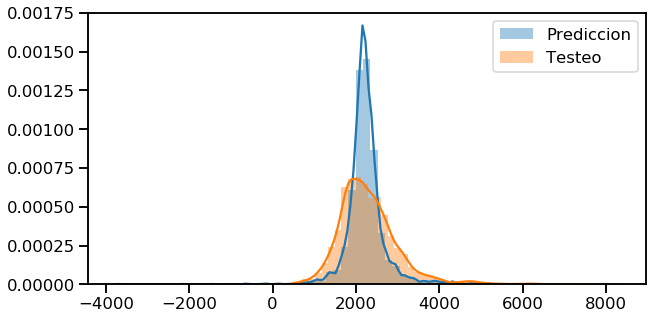

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(ypred3, label="Prediccion")
sns.distplot(ytest, label="Testeo")
plt.legend(loc=1)
plt.show()


In [67]:
r2_score(ytest,ypred3)

0.684362836921389

# Como conclusion, despues de aplicar varios modelos de regresion, pudimos determinar que el que mejor generaliza y predice con el menor error fue KNN.  